## 빅데이터 실습

### COVID19, 코로나 바이러스의 영향으로 중국인 관광객수 분석
> 1. 중간저장 엑셀파일 로드
> 2. 데이터 시각화
> 3. 관광객 수 TOP5 나라 시각화
> 4. 히트맵으로 시각화
### 시각화 차트, 히트캡으로 분석


In [1]:
# 판다스 사용등록
import pandas as pd

### 1. 중간저장 엑셀파일 로드

In [9]:
# 데이터 로드
df_total = pd.read_excel('../day03/data/kto_total.xlsx')
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0


In [10]:
condition = df_total['국적'] == '중국'

In [12]:
df_china = df_total[condition]

In [13]:
# 인덱스 변경(0부터 순차적으로)
df_china.reset_index(inplace=True)

In [14]:
df_china

,index,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
2,137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
3,197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
4,257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120,7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2
121,7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8
122,7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0
123,7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2


### 2. 데이터 시각화 

In [21]:
# 필요 라이브러리, 모듈 사용등록
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 꺠짐문제 해결
from matplotlib import rc

rc('font', family='D2Coding')

plt.rcParams['axes.unicode_minus'] = False

In [17]:
# 차트 스타일 설정
sns.set_style('darkgrid')

In [18]:
# 불필요한 경고메시지 제거
import warnings

warnings.filterwarnings('ignore')

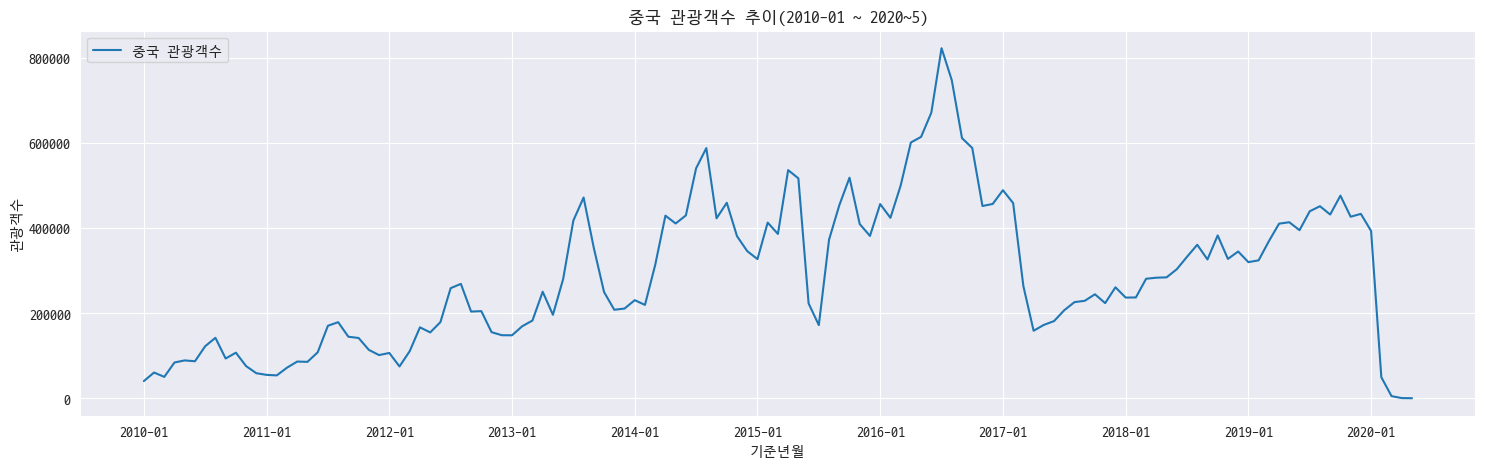

In [28]:
# 중국인 관광객 수 차트 다시
plt.figure(figsize=(18, 5))
plt.plot(df_china['기준년월'], df_china['관광'], label='중국 관광객수')  # 차트 x,y축, label
plt.title('중국 관광객수 추이(2010-01 ~ 2020~5)')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.legend(loc='upper left')
plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)])

plt.show()

### 관광객 수 TOP5 나라 시각화

In [29]:
countryList = ['중국', '일본', '대만', '미국', '홍콩']

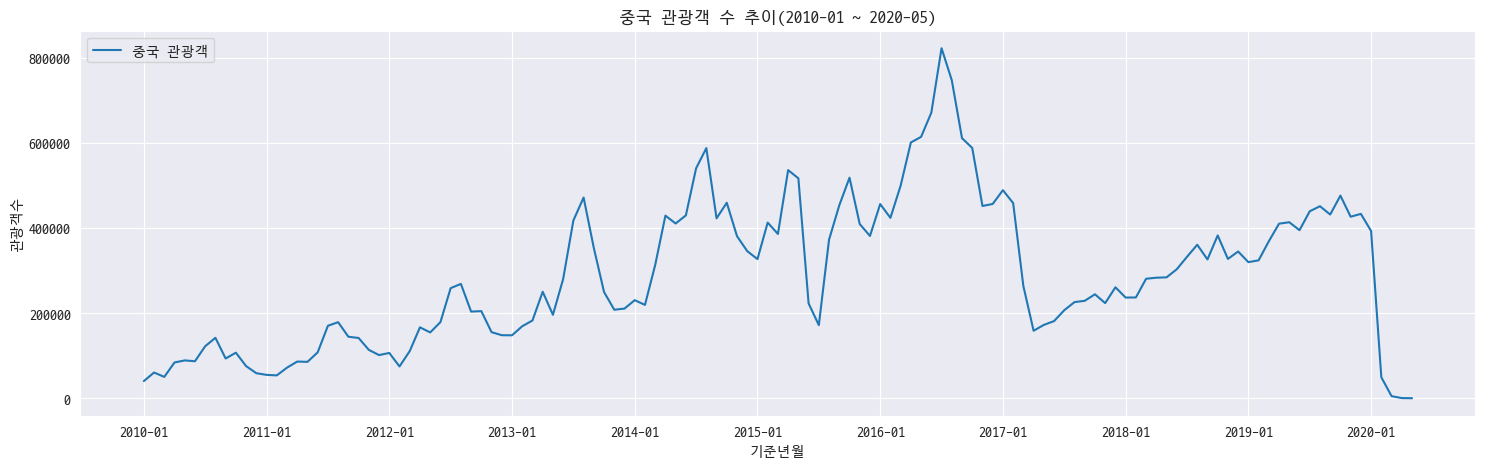

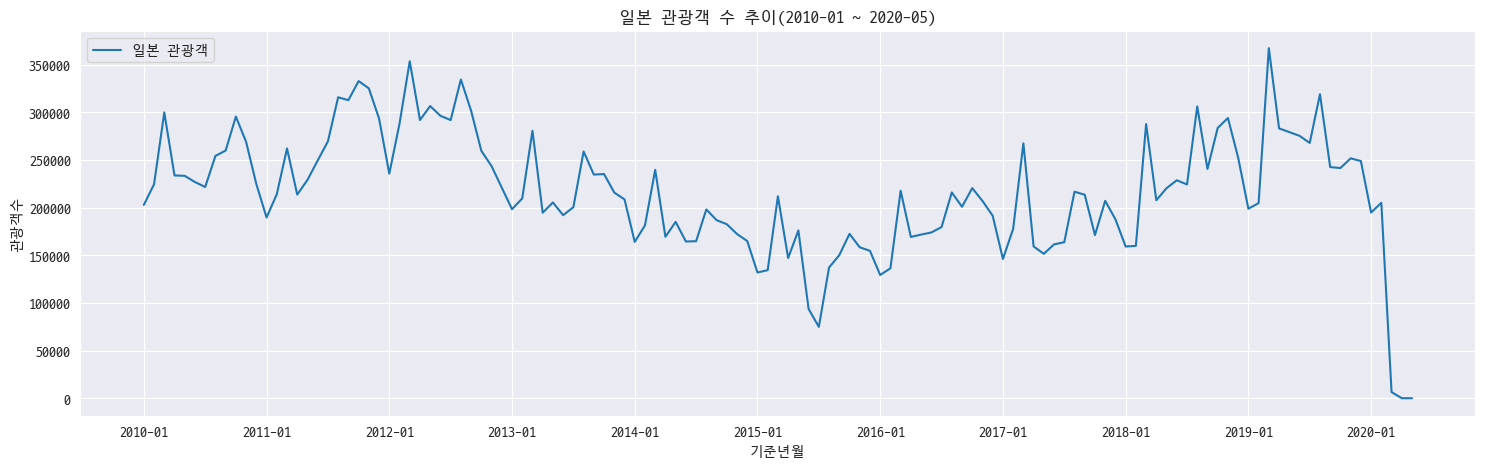

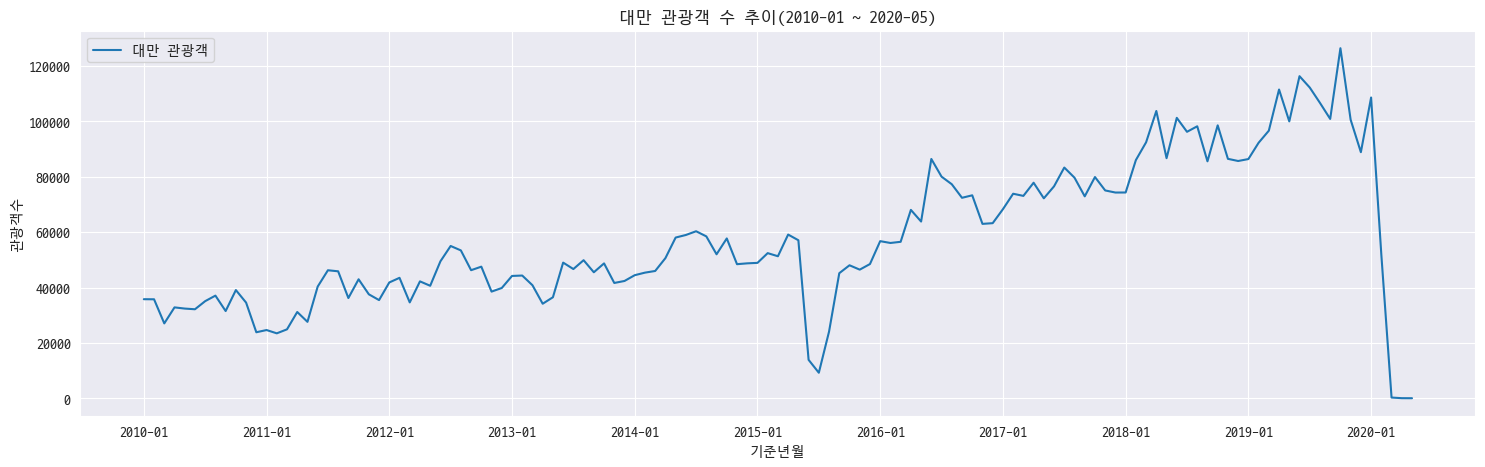

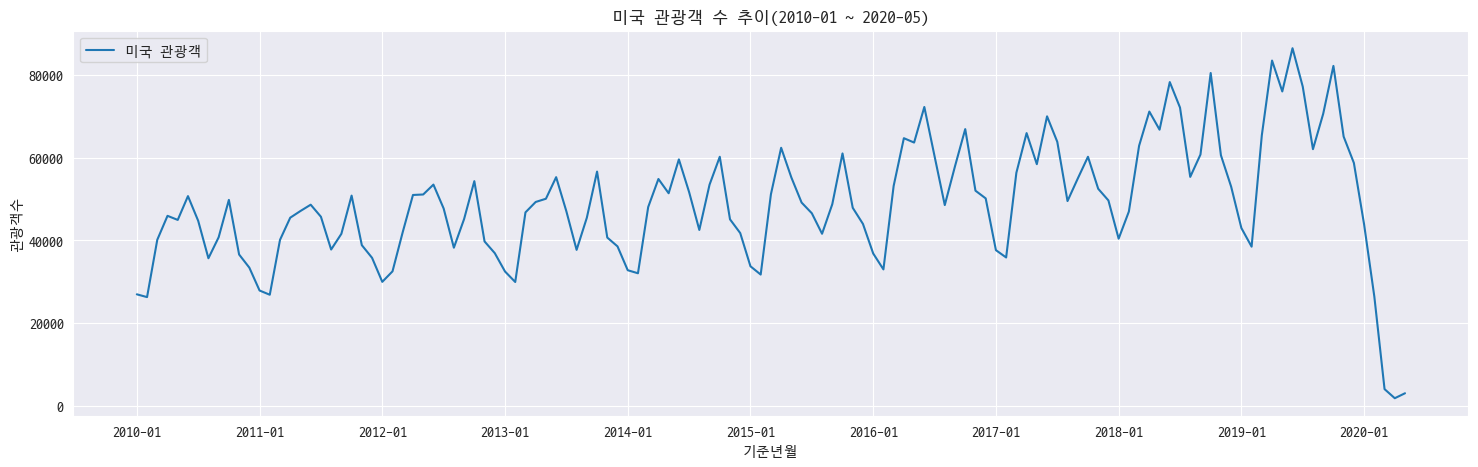

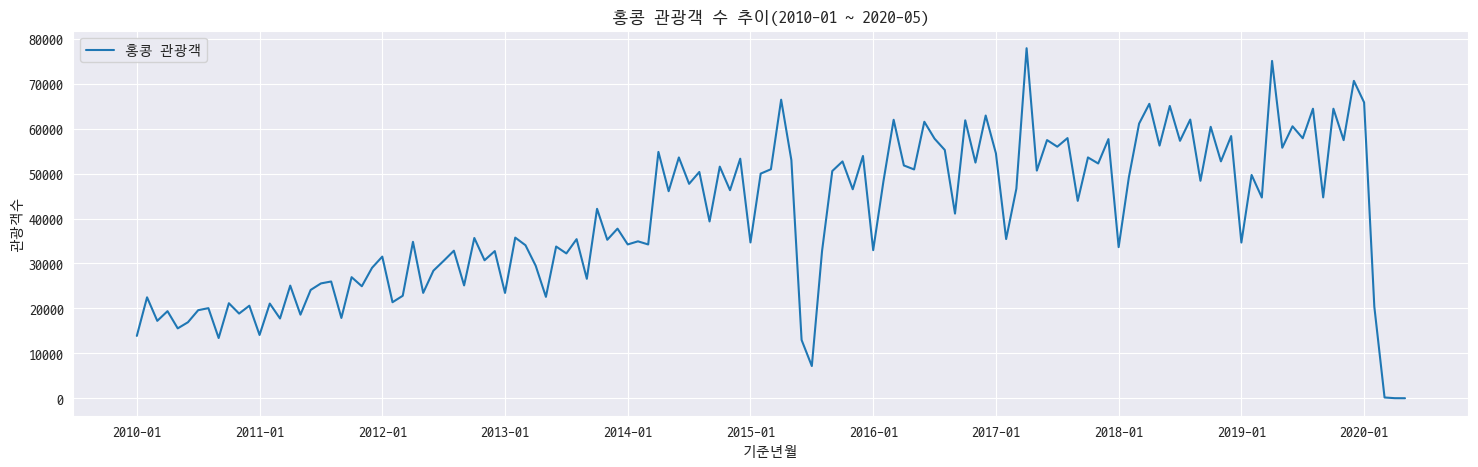

In [30]:
for country in countryList:
    condition = df_total['국적'] == country
    df_filter = df_total[condition]

    plt.figure(figsize=(18, 5))

    plt.plot(df_filter['기준년월'], df_filter['관광'], label=f'{country} 관광객')
    plt.title(f'{country} 관광객 수 추이(2010-01 ~ 2020-05)')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.legend(loc='upper left')

    plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)])
    plt.show()


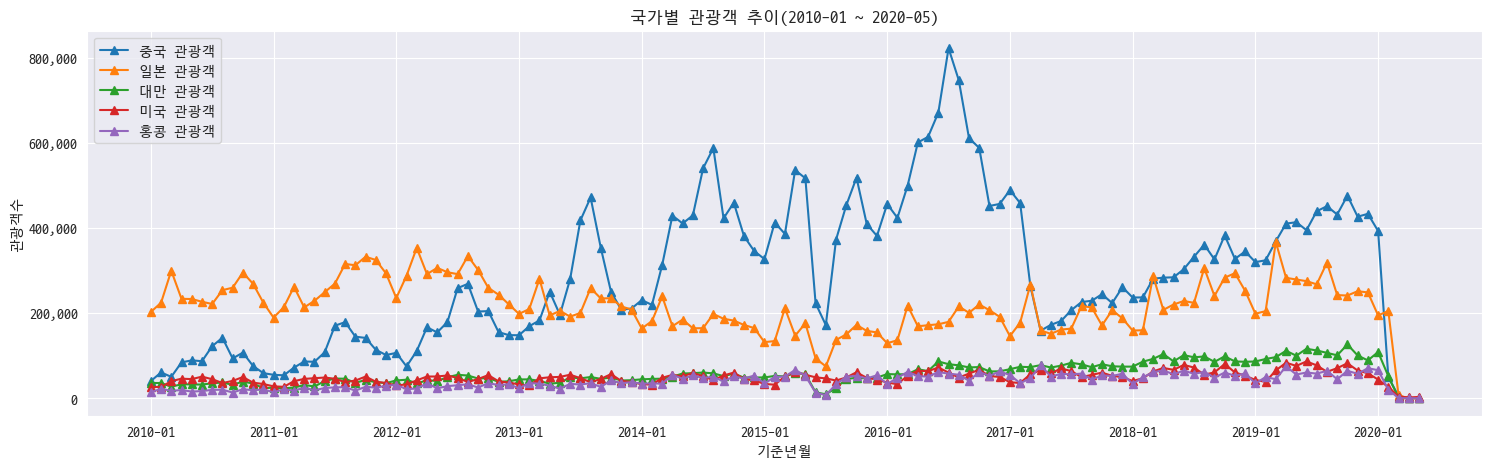

In [38]:
# 5개의 차트를 한개로 합침.
plt.figure(figsize=(18, 5))
for country in countryList:
    condition = df_total['국적'] == country
    df_filter = df_total[condition]

    plt.plot(df_filter['기준년월'], df_filter['관광'], label=f'{country} 관광객', marker='^')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.legend(loc='upper left')

    plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)])

plt.title('국가별 관광객 추이(2010-01 ~ 2020-05)')
## y축 라벨(1000단위 쉼표)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{x:,.0f}' for x in current_values])
plt.show()


### 히트맵
> 1. 기존 데이터의 기준년월을 년/월로 컬럼을 나눈다.
> 2. 중국인 관광객 수를 히트맵으로 시각화
> 3. 국가별 관광객수 TOP5 를 히트맵으로 시각화

In [39]:
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0


In [46]:
df_total['년도'] = df_total['기준년월'].str.slice(0, 4)  # 년도
df_total['월'] = df_total['기준년월'].str.slice(5, 7)  # 월

In [47]:
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0,2020,05
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0,2020,05
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0,2020,05
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0,2020,05


In [48]:
# 년,월을 추가한 df_total 로 df_china 만든다.
df_china = df_total[df_total['국적'] == '중국']

In [49]:
df_china

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2,2020,01
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8,2020,02
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0,2020,03
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2,2020,04


In [51]:
# 피벗 테이블로 구성
df_chinaPivot = df_china.pivot_table(values='관광', index='년도', columns='월', aggfunc='sum')

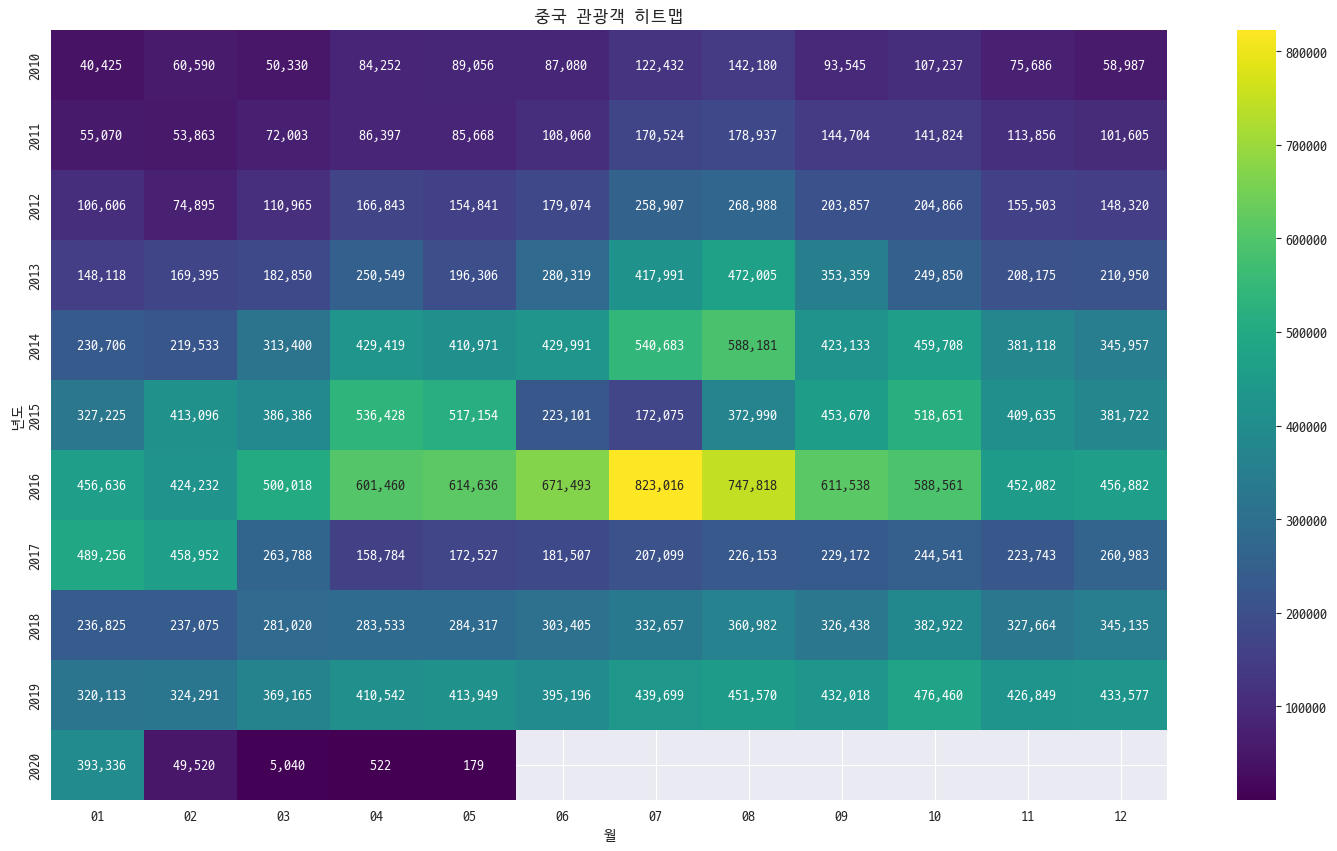

In [54]:
# 히트맵
plt.figure(figsize=(18, 10))
ax = sns.heatmap(df_chinaPivot, annot=True, fmt='.0f', cmap='viridis')
plt.title('중국 관광객 히트맵')

for t in ax.texts:
    t.set_text(f'{int(t.get_text()): ,d}')  # 1000단위 쉼표

plt.show()

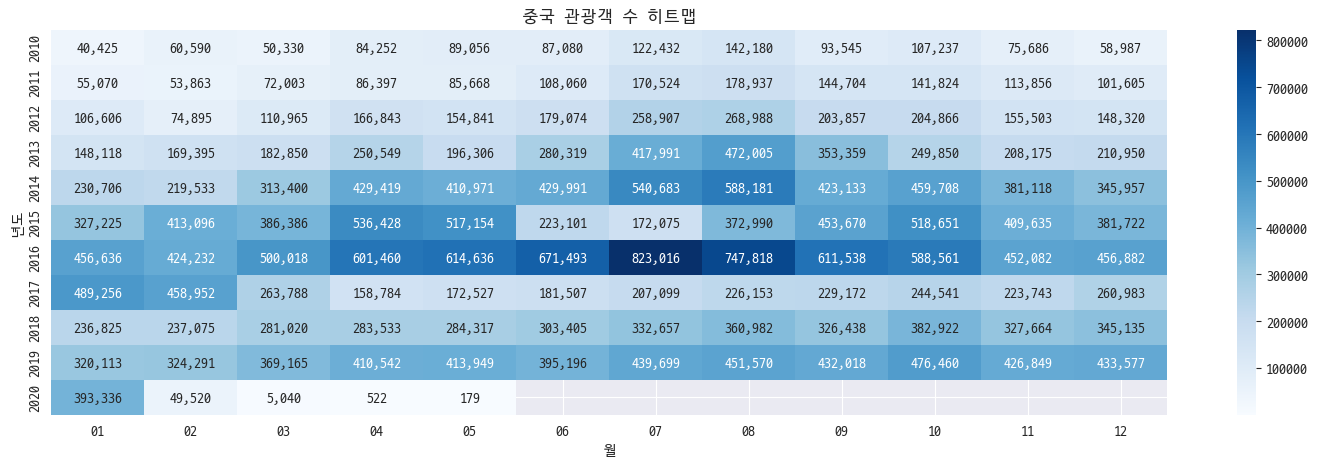

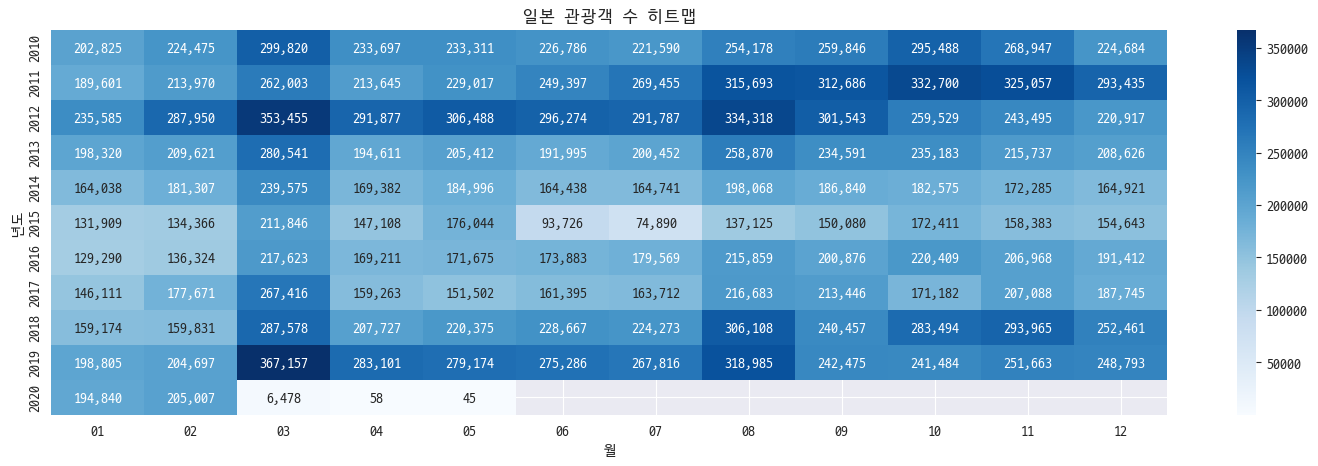

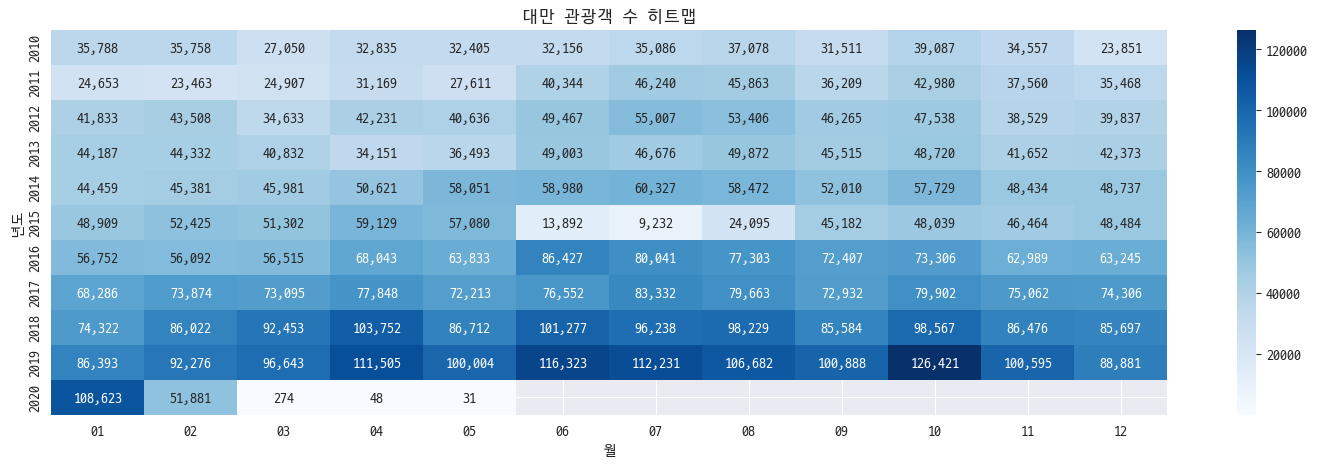

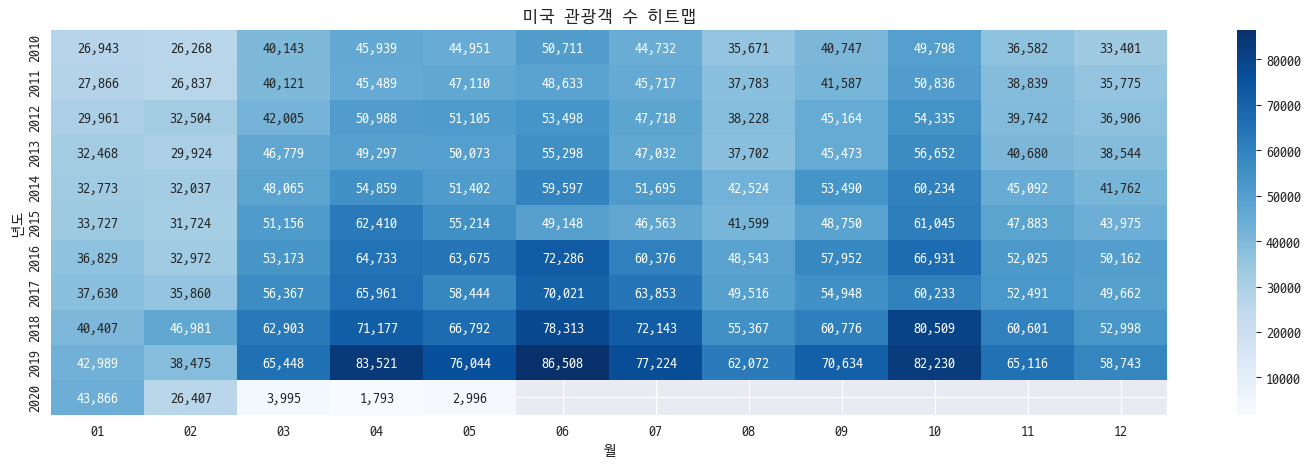

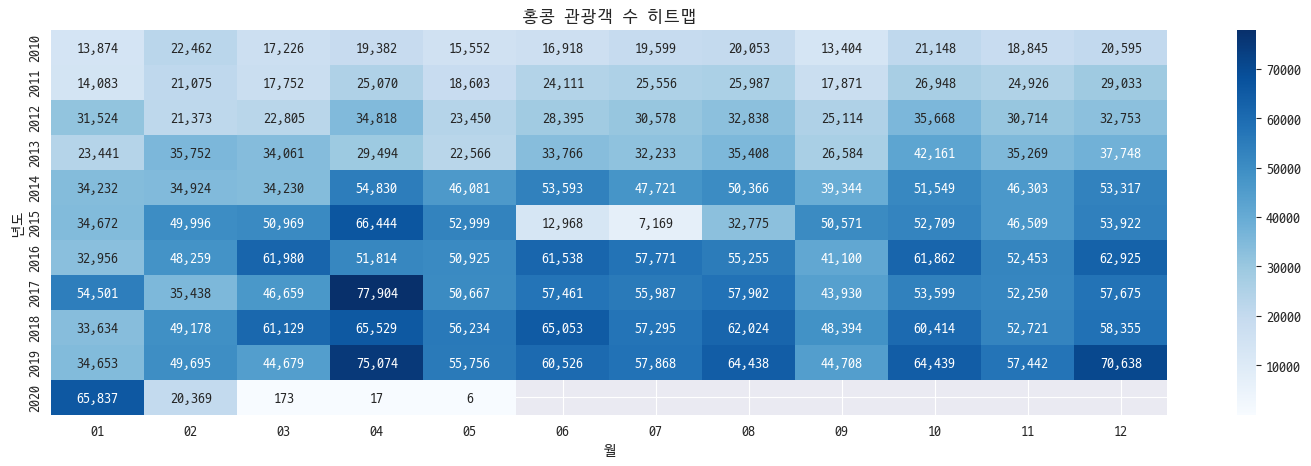

In [58]:
for country in countryList:
    condition = df_total['국적'] == country
    df_filter = df_total[condition]

    plt.figure(figsize=(18, 5))

    df_pivot = df_filter.pivot_table(values='관광', index='년도', columns='월', aggfunc='sum')

    ax = sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Blues')
    plt.title(f'{country} 관광객 수 히트맵')
    
    for t in ax.texts:
        t.set_text(f'{int(t.get_text()):,d}')

    plt.show()

### 시각화 차트, 히트캡으로 분석
- 2010년 이후로 꾸준히 증가
- 2017년 초에 큰폭으로 감소
- 여름에 관광객수가 피크, 단 2015년 여름만 큰폭으로 감소
- 2020년 초 관광객수가 0에 수렴
### 인터넷 검색 -> 구글링
1. 2015년 여름 관광객 수 감소 이유 검색
- 메르스(중동호흡기증후군) 발병 원인
2. 2017년 초에 큰폭으로 감소 이유 검색
- 사드(THAAD·고고도미사일방어) 보복, 미국에서 사드를 한국에 배치하자 이에 대한 반발로 중국인 관광객 금감
3. 2020년 3월부터 감소
- 우한폐렴(COVID19) 로 인한 감소(단, 전세계 동일)